In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('./source/ad_10000records.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB
None


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [99]:
df['Ad Topic Line'].value_counts()

Cloned explicit middleware                 344
Streamlined homogeneous analyzer           212
Business-focused transitional solution     207
Sharable reciprocal project                187
Intuitive exuding service-desk             173
                                          ... 
Ergonomic neutral portal                     1
Implemented uniform synergy                  1
Visionary multi-tasking alliance             1
Inverse zero tolerance customer loyalty      1
Reactive interactive protocol                1
Name: Ad Topic Line, Length: 559, dtype: int64

In [100]:
num_fields = []
cat_fields = []
target = 'Clicked on Ad'
for c in df.columns :
    if (df[c].dtype != 'object') & (c != target):
        num_fields.append(c)
    else:
        cat_fields.append(c)

In [101]:
df[num_fields].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831
std,15.704142,8.572973,13343.708718,40.820951
min,32.600000,19.000000,13996.500000,105.220000
25%,48.860000,29.000000,44052.302500,140.150000
50%,59.590000,35.000000,56180.930000,178.920000
75%,76.580000,42.000000,61840.260000,212.670000
max,90.970000,60.000000,79332.330000,269.960000


In [102]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


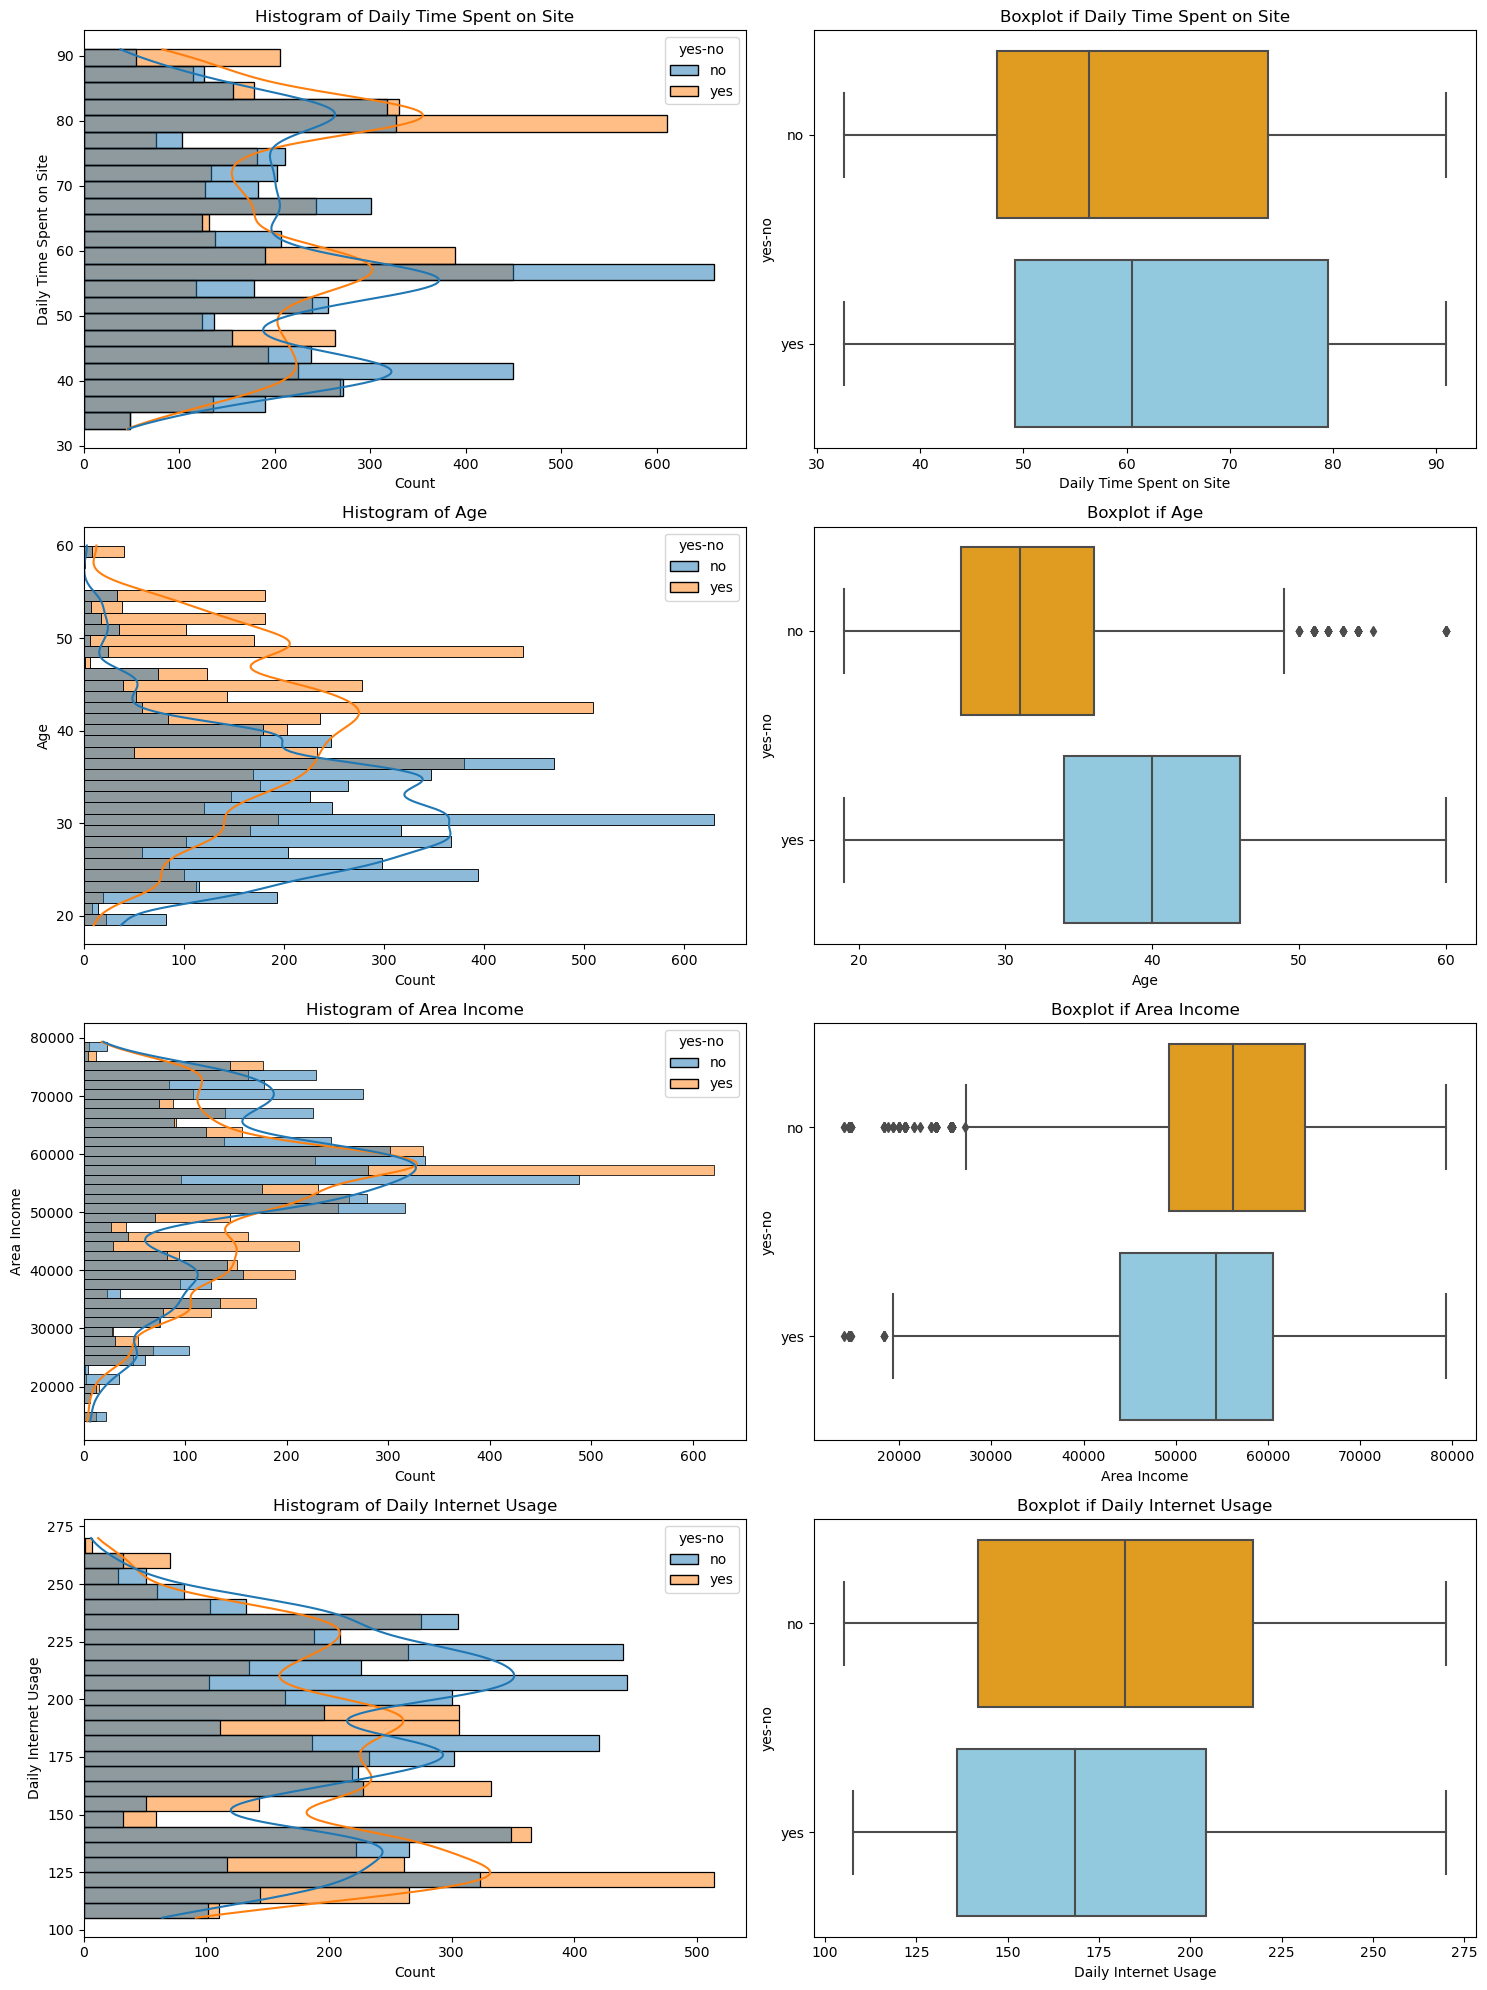

In [103]:
df['yes-no'] = df[target].map({1: 'yes', 0: 'no'})

fig, axes = plt.subplots(len(num_fields), 2, figsize=(15, 20))

for i, column in enumerate(num_fields):
    sns.histplot(data=df, y=column, kde=True, hue='yes-no', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')

    sns.boxplot(data=df, x=column, y='yes-no', 
                ax=axes[i, 1], palette = {'no': 'orange', 'yes': 'skyblue'})
    axes[i, 1].set_title(f'Boxplot if {column}')
    
plt.tight_layout()
plt.show()

NOTE:

- The users who spend more time on the website click more on ads.

- The users with high internet usage click less on ads compared to the users with low internet usage.

- The users around 40 years click more on ads compared to users around 27-36 years old.

- People from high-income areas click slighty less on ads

In [104]:
ctr = df[target].sum() / df.shape[0] * 100

print(f"The Click through rate: {round(ctr, 2)} %")

The Click through rate: 49.17 %


In [105]:
from sklearn.model_selection import train_test_split

X = df.drop(['yes-no', 'Ad Topic Line', 'City', 'Timestamp', 'Country'] + [target],
            axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=y)

X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
5436,78.64,31.0,56180.93,248.23,Female
273,68.88,42.0,59243.46,143.13,Male
4292,40.01,44.0,33553.90,137.24,Female
3318,65.77,23.0,25739.09,172.81,Male
1120,66.08,33.0,39616.00,122.31,Female


In [106]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

encoded_fields = ['Gender']
not_encoded_fields = [i for i in X_train.columns if i not in encoded_fields]

c_transf = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), encoded_fields),
    ('nothing', 'passthrough', not_encoded_fields)
])

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(c_transf, DecisionTreeClassifier(max_depth=4))
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('nothing', 'passthrough',
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4))])

In [108]:
print(model.named_steps)

{'columntransformer': ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), ['Gender']),
                                ('nothing', 'passthrough',
                                 ['Daily Time Spent on Site', 'Age',
                                  'Area Income', 'Daily Internet Usage'])]), 'decisiontreeclassifier': DecisionTreeClassifier(max_depth=4)}


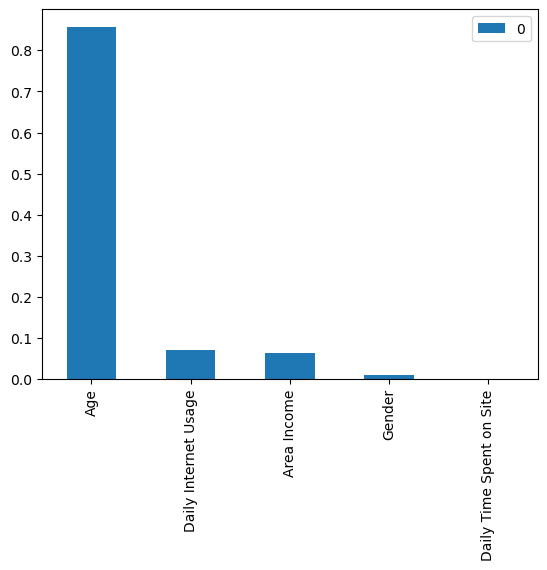

In [109]:
# print(model.named_steps)

feat_imp = model.named_steps['decisiontreeclassifier'].feature_importances_

ohe_fields = model\
                .named_steps['columntransformer']\
                .named_transformers_['ordinal']\
                .get_feature_names_out()\
                .tolist()

columns = ohe_fields + not_encoded_fields
importances = pd.DataFrame(feat_imp.reshape(1, -1), columns=columns)
importances.T.sort_values(by=0, ascending=False).plot(kind='bar')
plt.show()

In [110]:
y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1525
           1       0.82      0.60      0.69      1475

    accuracy                           0.74      3000
   macro avg       0.75      0.73      0.73      3000
weighted avg       0.75      0.74      0.73      3000



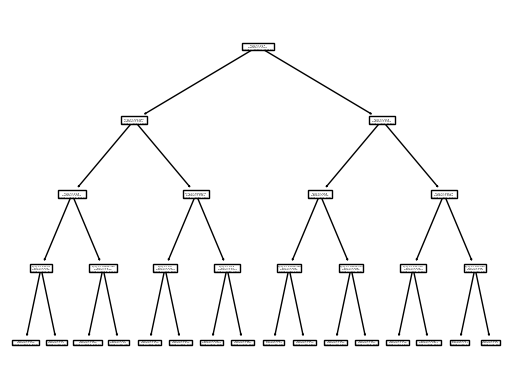

In [112]:
from sklearn import tree
tree.plot_tree(model.named_steps['decisiontreeclassifier'])
plt.show()

In [115]:
# Testing model

print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
oneTest = pd.DataFrame(features, columns=X_test.columns)
print("Will the user click on ad = ", model.predict(oneTest))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 62.26
Age: 28
Area Income: 61840.26
Daily Internet Usage: 207.17
Gender (Male = 1, Female = 0) : Female
Will the user click on ad =  [0]


Ads Click Through Rate Prediction : 
- Daily Time Spent on Site: 62.26
- Age: 28
- Area Income: 61840.26
- Daily Internet Usage: 207.17
- Gender (Male = 1, Female = 0) : Female
- Will the user click on ad =  [0]